In [1]:
!pip install ucimlrepo

In [55]:
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=186)
X = wine.data.features
y = wine.data.targets



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7168 - loss: 0.5498 - val_accuracy: 0.7508 - val_loss: 0.5019
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7515 - loss: 0.5047 - val_accuracy: 0.7662 - val_loss: 0.4791
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7668 - loss: 0.4844 - val_accuracy: 0.7623 - val_loss: 0.4803
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7777 - loss: 0.4628 - val_accuracy: 0.7700 - val_loss: 0.4759
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7836 - loss: 0.4587 - val_accuracy: 0.7738 - val_loss: 0.4739
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7953 - loss: 0.4450 - val_accuracy: 0.7600 - val_loss: 0.4876
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7864 - loss: 0.4439 - val_accuracy: 0.7685 - val_loss: 0.4928
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7870 - loss: 0.4374 - val_ac

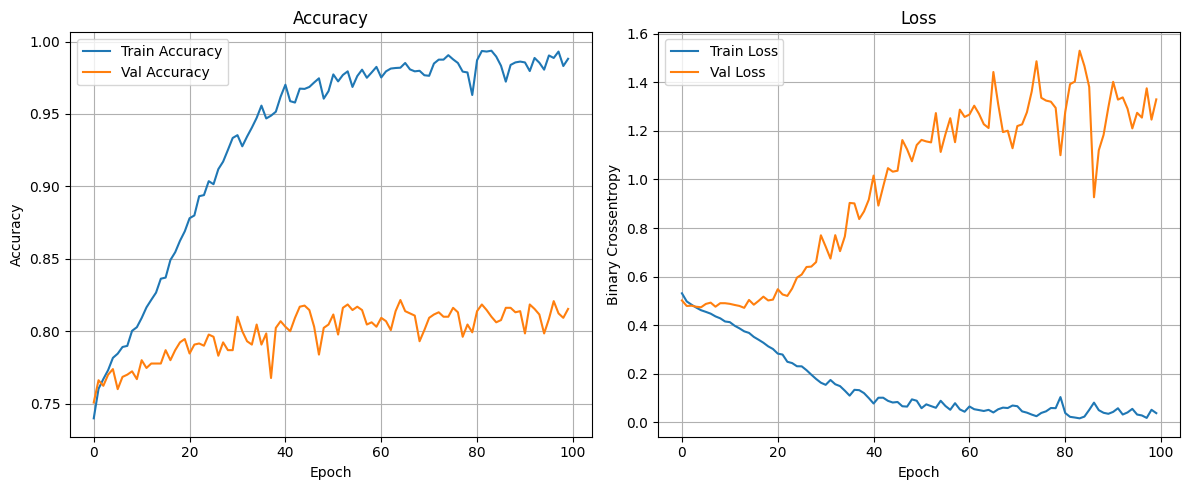

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

wine = fetch_ucirepo(id=186)
X = wine.data.features
y = wine.data.targets.values.ravel()

y_binary = (y >= 6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 1. Uproszczenie modelu

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6100 - loss: 0.6471 - val_accuracy: 0.7254 - val_loss: 0.5364
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7440 - loss: 0.5291 - val_accuracy: 0.7438 - val_loss: 0.5081
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7578 - loss: 0.5101 - val_accuracy: 0.7531 - val_loss: 0.4978
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7649 - loss: 0.4947 - val_accuracy: 0.7592 - val_loss: 0.4952
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7672 - loss: 0.4911 - val_accuracy: 0.7646 - val_loss: 0.4904
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7601 - loss: 0.4970 - val_accuracy: 0.7538 - val_loss: 0.4938
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7738 - loss: 0.4840 - val_accuracy: 0.7554 - val_loss: 0.4875
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7619 - loss: 0.4812 - val_accu

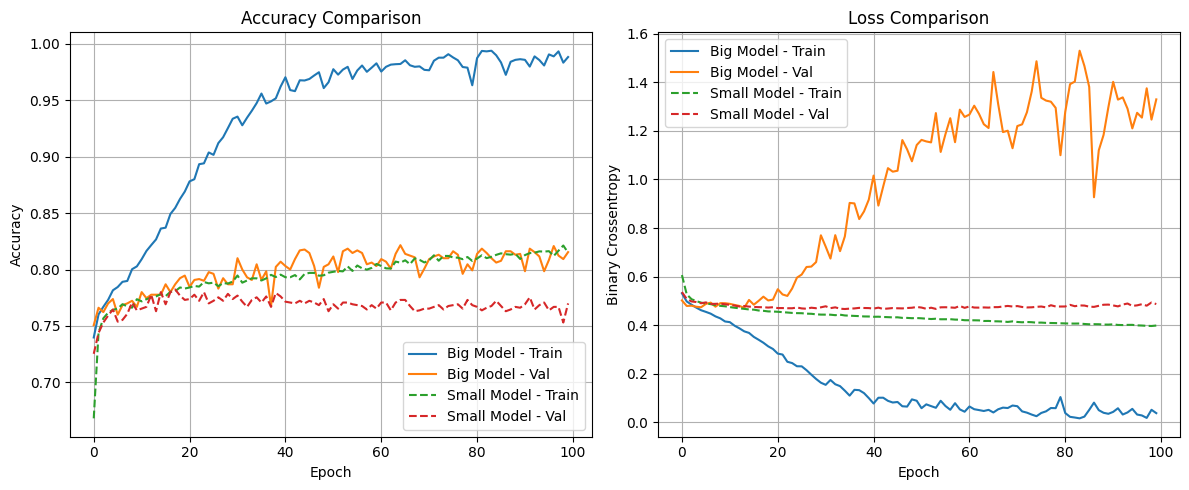

In [59]:
small_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

small_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

small_history = small_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Big Model - Train')
plt.plot(history.history['val_accuracy'], label='Big Model - Val')
plt.plot(small_history.history['accuracy'], label='Small Model - Train', linestyle='--')
plt.plot(small_history.history['val_accuracy'], label='Small Model - Val', linestyle='--')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Big Model - Train')
plt.plot(history.history['val_loss'], label='Big Model - Val')
plt.plot(small_history.history['loss'], label='Small Model - Train', linestyle='--')
plt.plot(small_history.history['val_loss'], label='Small Model - Val', linestyle='--')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Ocena
Z powyszego wykresu mozna wnioskowac, ze uproszczenie modelu pomoglo z generalizacja modelu, wykresy strat dla danych testowych i danych walidacyjnych prwaie sie pokrywaja, co jest znacznym plusem

## Uwaga
Z powyzszych wykresow wynika rowniez ze model osiagnal *gorsza* dokladnosc niz poprzedni przeuczony. Jednakze brak przeuczenia jest dobrym krokiem do ulepszania naszego modelu.

# 2. Dropout

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6585 - loss: 0.5973 - val_accuracy: 0.7338 - val_loss: 0.5115
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7446 - loss: 0.5328 - val_accuracy: 0.7485 - val_loss: 0.5062
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7602 - loss: 0.5058 - val_accuracy: 0.7508 - val_loss: 0.4956
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7607 - loss: 0.4962 - val_accuracy: 0.7469 - val_loss: 0.5038
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7507 - loss: 0.5047 - val_accuracy: 0.7700 - val_loss: 0.4788
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7623 - loss: 0.4973 - val_accuracy: 0.7631 - val_loss: 0.4821
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7570 - loss: 0.5056 - val_accuracy: 0.7692 - val_loss: 0.4780
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7605 - loss: 0.5008 - val_accuracy: 0.760

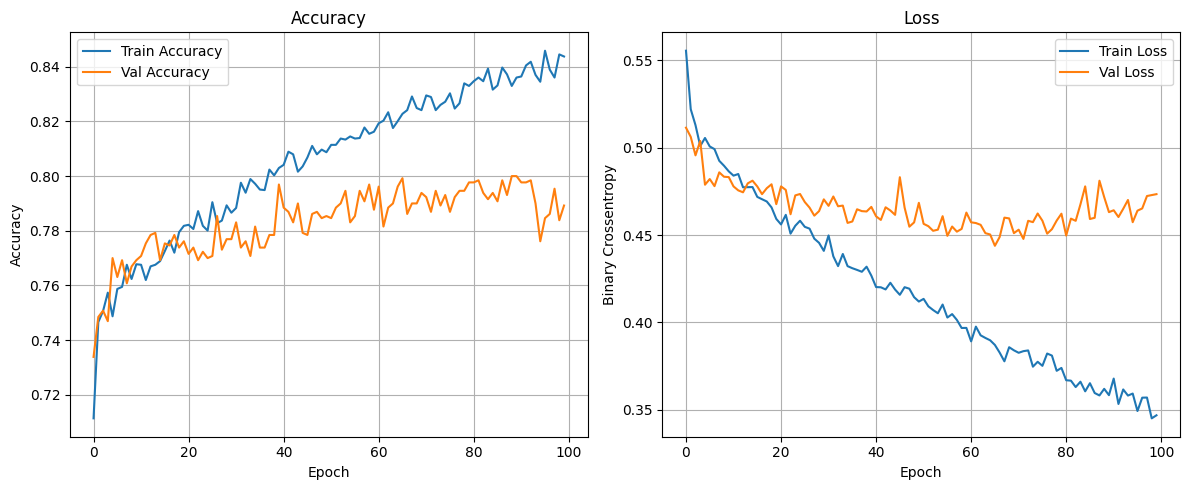

In [60]:

from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

dropout_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

dropout_history = dropout_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

def plot_accuracy_and_loss(history, title):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Val Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

plot_accuracy_and_loss(dropout_history, 'Dropout Model')

Zastosowanie metody Dropout, ktora opiera sie na wylaczaniu neuronow podczas treningu bardzo poprawilo nasz model. Skutecznosc na zbiorze walidacyjnym jest bardzo podobna do sieci bez droupoutu, lecz po wykresie straty widzimy znaczną poprawę, dropout bardzo zmniejszył nam przeuczenie, co oznacza że będzie on dobrym parametrem do wprowadzenia w końcowej sieci.

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7142 - loss: 1.0090 - val_accuracy: 0.7492 - val_loss: 0.6950
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7470 - loss: 0.6689 - val_accuracy: 0.7600 - val_loss: 0.5943
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7650 - loss: 0.5835 - val_accuracy: 0.7662 - val_loss: 0.5473
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7660 - loss: 0.5514 - val_accuracy: 0.7615 - val_loss: 0.5261
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7764 - loss: 0.5237 - val_accuracy: 0.7415 - val_loss: 0.5559
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7712 - loss: 0.5249 - val_accuracy: 0.7685 - val_loss: 0.5145
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7632 - loss: 0.5258 - val_accuracy: 0.7546 - val_loss: 0.5167
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7684 - loss: 0.5152 - val_accuracy: 0.77

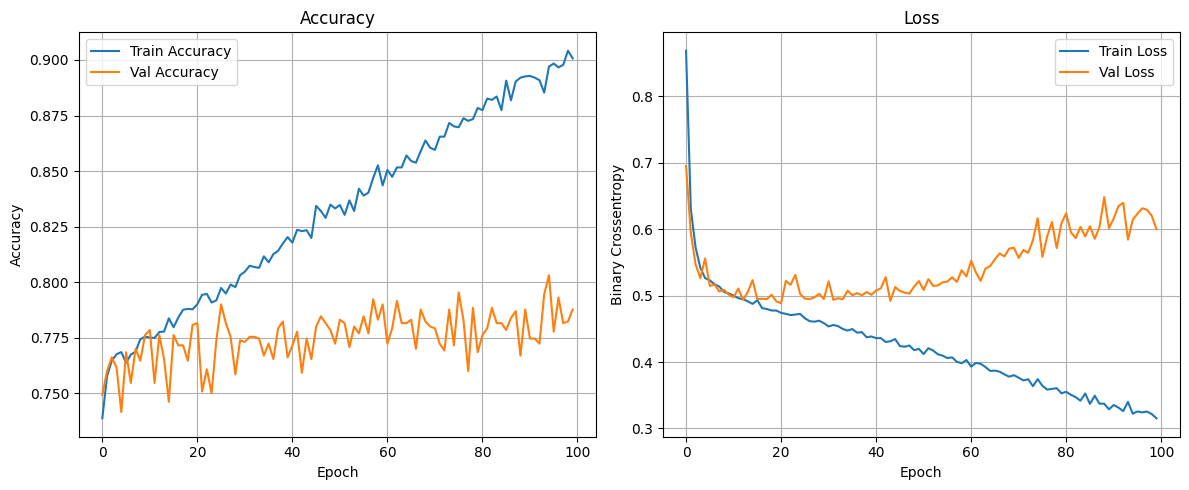

In [61]:
from tensorflow.keras.regularizers import l2

l2_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

l2_history = l2_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
plot_accuracy_and_loss(l2_history, 'L2 Regularization Model')

L2 niestety w tym wypadku wypadla slabo...

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6988 - loss: 5.3665 - val_accuracy: 0.7338 - val_loss: 0.7970
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7345 - loss: 0.7457 - val_accuracy: 0.7408 - val_loss: 0.6389
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7484 - loss: 0.6358 - val_accuracy: 0.7454 - val_loss: 0.6091
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7407 - loss: 0.6220 - val_accuracy: 0.7438 - val_loss: 0.5980
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7480 - loss: 0.6099 - val_accuracy: 0.7415 - val_loss: 0.5916
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7519 - loss: 0.5865 - val_accuracy: 0.7500 - val_loss: 0.6044
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7578 - loss: 0.5785 - val_accuracy: 0.7477 - val_loss: 0.5763
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7495 - loss: 0.5779 - val_accuracy: 0.74

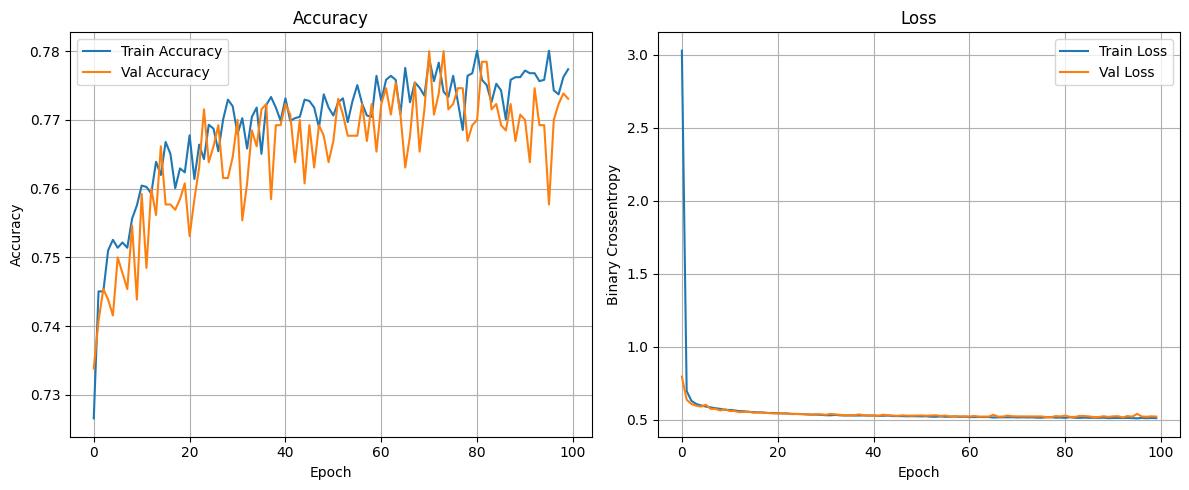

In [62]:
from tensorflow.keras.regularizers import l1

l1_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(1, activation='sigmoid')
])

l1_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

l1_history = l1_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

plot_accuracy_and_loss(l1_history, 'L1 Regularization Model')

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7201 - loss: 0.5585 - val_accuracy: 0.7562 - val_loss: 0.5002
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7620 - loss: 0.4953 - val_accuracy: 0.7577 - val_loss: 0.4961
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7721 - loss: 0.4810 - val_accuracy: 0.7746 - val_loss: 0.4770
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7855 - loss: 0.4692 - val_accuracy: 0.7662 - val_loss: 0.4783
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7846 - loss: 0.4586 - val_accuracy: 0.7715 - val_loss: 0.4854
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7888 - loss: 0.4454 - val_accuracy: 0.7715 - val_loss: 0.4739
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7847 - loss: 0.4463 - val_accuracy: 0.7654 - val_loss: 0.4742
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7947 - loss: 0.4352 - val_acc

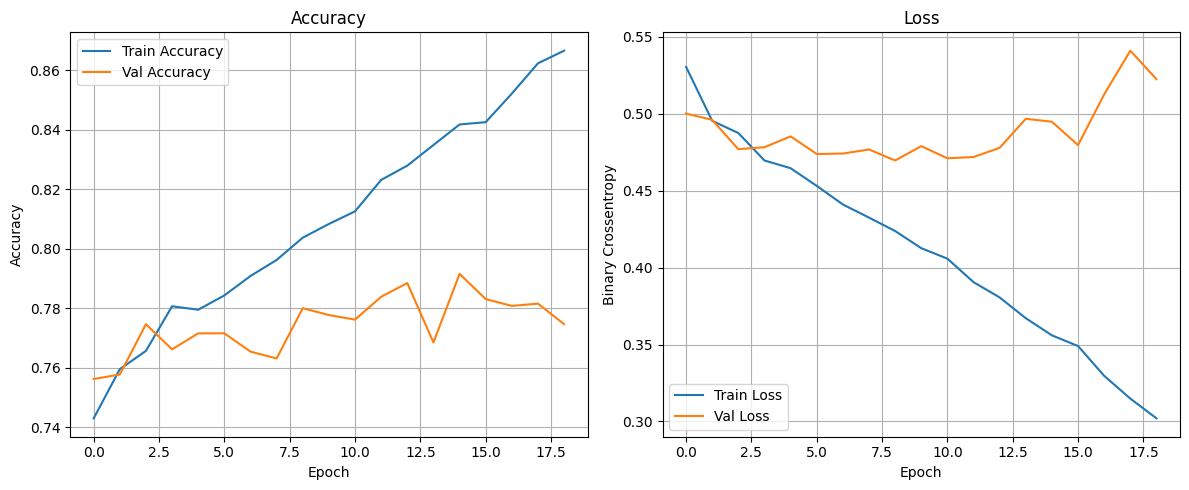

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

early_stop_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

early_history = early_stop_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)
plot_accuracy_and_loss(early_history, 'Early Stopping Model')

Niestety sam early stopping to za malo zeby zapobiec przeuczaniu, jest to jednak swietna technika do laczenia z innymi

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6697 - loss: 5.2714 - val_accuracy: 0.7431 - val_loss: 0.9040
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7351 - loss: 0.8200 - val_accuracy: 0.7492 - val_loss: 0.6563
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7385 - loss: 0.6610 - val_accuracy: 0.7485 - val_loss: 0.6150
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7352 - loss: 0.6366 - val_accuracy: 0.7492 - val_loss: 0.5960
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7477 - loss: 0.6048 - val_accuracy: 0.7354 - val_loss: 0.5945
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7348 - loss: 0.6194 - val_accuracy: 0.7292 - val_loss: 0.6034
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7403 - loss: 0.6013 - val_accuracy: 0.7477 - val_loss: 0.5817
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7482 - loss: 0.5923 - val_accu

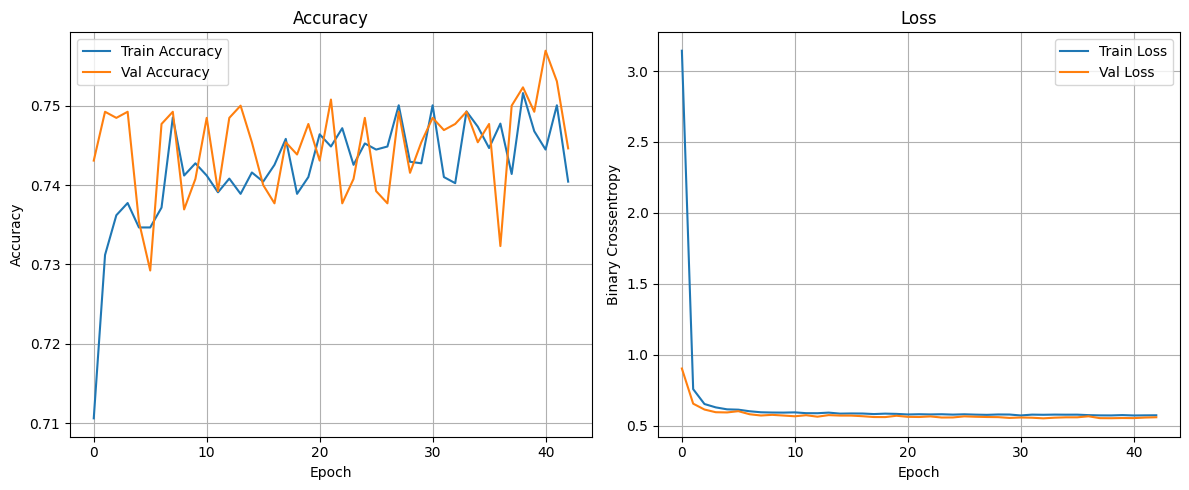

In [66]:
combined_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

combined_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

combined_history = combined_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)

plot_accuracy_and_loss(combined_history, 'Combined Model')

Pomimo że model bez żadnych metod regularizacji osiągnął najwyższy wynik na zbiorze walidacyjnym, jego duża rozbieżność między dokładnością treningową a walidacyjną świadczyła o przeuczeniu.
Metody takie jak Dropout, L1/L2 regularizacja oraz EarlyStopping znacząco ograniczyły overfitting kosztem nieznacznego spadku dokładności.
W praktyce modele regularizowane mogą być bardziej niezawodne przy generalizacji na nowe dane.